In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import cactas as C

In [4]:
DATAPATH = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'

In [6]:
DATASETS = sorted([v for v in os.listdir(DATAPATH) if os.path.isdir(DATAPATH + v)])

images = []
labels = []

for i,d in enumerate(DATASETS):
    
    # ignore DICOM 12 since we have DICOM 12-checked
    if d == 'DICOM 12' or d == 'DICOM 61' or d == 'DICOM 51':
        continue
    

    image_with_header, label_with_header = C.Util.load(i, datapath=DATAPATH, with_header=True)

    spacing = [image_with_header[1]['space directions'][0,0],
               image_with_header[1]['space directions'][1,1],
               1]
#                image_with_header[1]['space directions'][2,2]]
#
#     print(d, spacing)
    
    image = image_with_header[0]
    label = label_with_header[0]
    
#     print(image.shape)
    
# #     image_zoomed, label_zoomed = C.Util.zoom(image_filtered, label_binarized, spacing)
    
#     print('after zoom', image_zoomed.shape)
    
    # crop according to all annotations
    image_cropped, label_cropped = C.Util.crop(image, label, target_size=None, just_z=True)
    
    # remove all slices without annotations
    image_filtered, label_filtered = C.Util.filter(image_cropped, label_cropped)
    
    label_binarized = C.Util.binarize(label_filtered)
    
# #     image_zoomed, label_zoomed = C.Util.zoom(image_filtered, label_binarized, spacing)
    
#     print(image_filtered.shape)
    
    images.append(image_filtered)
    labels.append(label_binarized)
    

In [7]:
print('Total images/labels:', len(images))

Total images/labels: 33


In [8]:
padded_images, padded_labels = C.Util.pad(images, labels)

In [9]:
padded_images.shape

(503, 512, 512)

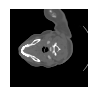

In [10]:
C.Util.view(padded_images[0], padded_labels[0])

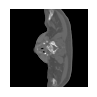

In [11]:
C.Util.view(padded_images[10], padded_labels[10])

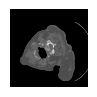

In [12]:
C.Util.view(padded_images[200], padded_labels[200])

In [16]:
#
# now we can store padded_images and padded_labels as .npy files
#
np.save(os.path.join(DATAPATH, 'images.npy'), padded_images)
np.save(os.path.join(DATAPATH, 'labels.npy'), padded_labels)

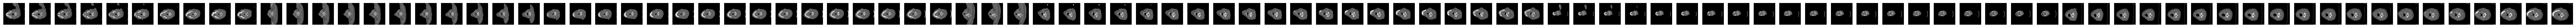

In [13]:
C.Util.view(np.moveaxis(padded_images[0:100], 0, 2) , np.moveaxis(padded_labels[0:100], 0, 2) )